In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yoon_area = pd.read_csv("대전_부산_서울_세종_울산_인천_손실데이터.csv")

In [4]:
yoon_area

,Unnamed: 0,TM,LOC,value
0,62705,202002201700,부산,4.074874e+06
1,62706,202002201800,부산,1.150780e+06
2,209979,202112040300,대전,1.720000e+03
3,209980,202112040400,대전,1.640000e+03
4,211281,202101270900,부산,2.272270e+07
...,...,...,...,...
58,480561,202302020900,세종,5.013528e+06
59,480562,202302021000,세종,1.127098e+07
60,480563,202302021100,세종,1.487211e+07
61,480564,202302021200,세종,1.462958e+07


In [5]:
yoon_area_daejeon = yoon_area.loc[yoon_area['LOC'] == '대전']

In [6]:
my_area_data_wdm_daejeon = pd.read_csv("my_area_data_wdm_daejeon.csv")
my_area_data_wdm_busan = pd.read_csv("my_area_data_wdm_busan.csv")
my_area_data_wdm_seoul = pd.read_csv("my_area_data_wdm_seoul.csv")
my_area_data_wdm_sejong = pd.read_csv("my_area_data_wdm_sejong.csv")
my_area_data_wdm_ulsan = pd.read_csv("my_area_data_wdm_ulsan.csv")
my_area_data_wdm_incheon = pd.read_csv("my_area_data_wdm_incheon.csv")

In [7]:
for i in np.array(yoon_area_daejeon['TM']):
    value_to_insert = i
    dict_list = [
    {'TM': value_to_insert},
    {'Unnamed: 0': 0},
    {'WD': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].WD)[0]},
    {'WS': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].WS)[0]},
    {'PA': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].PA)[0]},
    {'PS': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].PS)[0]},
    {'TA': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].TA)[0]},
    {'TD': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].TD)[0]},
    {'HM': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].HM)[0]},
    {'PV': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].PV)[0]},
    {'RN_DAY': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].RN_DAY)[0]},
    {'SD_TOT': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].SD_TOT)[0]},
    {'CA_TOT': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].CA_TOT)[0]},
    {'CA_MID': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].CA_MID)[0]},
    {'VS': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].VS)[0]},
    {'SS': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].SS)[0]},
    {'SI': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].SI)[0]},
    {'TS': np.array(my_area_data_wdm_daejeon.loc[my_area_data_wdm_daejeon['TM'] == (value_to_insert - 100)].TS)[0]},
    {'year': 0},
    {'month': 0},
    {'day': 0},
    {'hour': 0}
    ]

    # 딕셔너리를 하나로 합치기
    merged_dict = {}
    for d in dict_list:
        merged_dict.update(d)

    # 딕셔너리를 데이터프레임으로 변환
    df2 = pd.DataFrame(merged_dict, index=[0])
    # 새로운 행 삽입
    my_area_data_wdm_daejeon = pd.concat([df2, my_area_data_wdm_daejeon], ignore_index=True)

    # 데이터프레임 정렬
my_area_data_wdm_daejeon = my_area_data_wdm_daejeon.sort_values('TM').reset_index(drop=True)


In [8]:
def process_and_extract_columns_testa(input_df):
    # 'TM' 컬럼에서 'year', 'month', 'day', 'hour'를 추출하여 새로운 컬럼에 저장
    input_df['year'] = 0
    input_df['month'] = 0
    input_df['day'] = 0
    input_df['hour'] = 0
    for i in range(len(input_df)):
        input_df['year'].iloc[i] = str(input_df['TM'].iloc[i])[:4]
        input_df['month'].iloc[i] = str(input_df['TM'].iloc[i])[4:6]
        input_df['day'].iloc[i] = str(input_df['TM'].iloc[i])[6:8]
        input_df['hour'].iloc[i] = str(input_df['TM'].iloc[i])[8:10]

    # 'TM'과 'SI'만 포함하는 새로운 테이블 생성
    new_table = input_df
    
    return new_table

In [9]:
my_area_data_wdm_daejeon_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_daejeon).drop(['Unnamed: 0'], axis=1)
my_area_data_wdm_busan_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_busan).drop(['Unnamed: 0'], axis=1)
my_area_data_wdm_seoul_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_seoul).drop(['Unnamed: 0'], axis=1)
my_area_data_wdm_sejong_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_sejong).drop(['Unnamed: 0'], axis=1)
my_area_data_wdm_ulsan_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_ulsan).drop(['Unnamed: 0'], axis=1)
my_area_data_wdm_incheon_SI_df_testa = process_and_extract_columns_testa(my_area_data_wdm_incheon).drop(['Unnamed: 0'], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_13808\1912473915.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  input_df['year'].iloc[i] = str(input_df['TM'].iloc[i])[:4]
C:\Users\user\AppData\Local\Temp\ipykernel_13808\1912473915.py:8: Sett

In [10]:
my_area_data_wdm_daejeon_SI_df_test_smaple = my_area_data_wdm_daejeon_SI_df_testa.copy()
# 'year', 'month', 'day', 'hour' 컬럼을 합쳐서 'datetime_column' 컬럼 생성
my_area_data_wdm_daejeon_SI_df_test_smaple['datetime_column'] = pd.to_datetime(my_area_data_wdm_daejeon_SI_df_test_smaple[['year', 'month', 'day', 'hour']])

# 결과 확인
my_area_data_wdm_daejeon_SI_df_test_smaple

,TM,WD,WS,PA,PS,TA,TD,HM,PV,RN_DAY,SD_TOT,CA_TOT,CA_MID,VS,SS,SI,TS,year,month,day,hour,datetime_column
0,202001010000,25,1.3,1026.5,1035.8,-7.5,-11.5,73.0,2.5,0.0,0.0,0.0,0.0,2056,0.0,0.00,-3.6,2020,01,01,00,2020-01-01 00:00:00
1,202001010100,18,1.6,1025.8,1035.1,-7.5,-12.0,70.0,2.4,0.0,0.0,0.0,0.0,1991,0.0,0.00,-3.7,2020,01,01,01,2020-01-01 01:00:00
2,202001010200,18,1.1,1025.1,1034.4,-7.5,-12.0,70.0,2.4,0.0,0.0,2.0,0.0,1987,0.0,0.00,-3.4,2020,01,01,02,2020-01-01 02:00:00
3,202001010300,16,1.2,1024.9,1034.1,-6.5,-11.0,70.0,2.6,0.0,0.0,9.0,9.0,2444,0.0,0.00,-1.9,2020,01,01,03,2020-01-01 03:00:00
4,202001010400,0,0.2,1024.7,1033.9,-6.1,-10.8,69.0,2.7,0.0,0.0,9.0,9.0,2367,0.0,0.00,-1.5,2020,01,01,04,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29923,202305311900,5,1.1,1000.9,1008.6,25.2,12.4,45.0,14.4,0.0,0.0,3.0,0.0,5000,1.0,0.48,24.6,2023,05,31,19,2023-05-31 19:00:00
29924,202305312000,7,0.6,1001.0,1008.7,23.7,12.6,50.0,14.6,0.0,0.0,3.0,0.0,5000,0.1,0.03,22.4,2023,05,31,20,2023-05-31 20:00:00
29925,202305312100,0,0.0,1001.8,1009.6,22.4,13.9,59.0,15.9,0.0,0.0,7.0,0.0,5000,0.0,0.00,21.1,2023,05,31,21,2023-05-31 21:00:00
29926,202305312200,0,0.0,1002.3,1010.1,21.8,12.8,57.0,14.8,0.0,0.0,7.0,6.0,5000,0.0,0.00,20.4,2023,05,31,22,2023-05-31 22:00:00


In [16]:
my_area_data_wdm_daejeon_SI_df_test_smaple.columns

Index(['TM', 'WD', 'WS', 'PA', 'PS', 'TA', 'TD', 'HM', 'PV', 'RN_DAY',
       'SD_TOT', 'CA_TOT', 'CA_MID', 'VS', 'SS', 'SI', 'TS', 'year', 'month',
       'day', 'hour', 'datetime_column'],
      dtype='object')

In [11]:
y = my_area_data_wdm_daejeon_SI_df_test_smaple.drop(['TM','year','month','day','hour','datetime_column'], axis=1)
x = my_area_data_wdm_daejeon_SI_df_test_smaple.drop(['TM', 'WD', 'WS', 'PA', 'PS', 'TA', 'TD', 'HM', 'PV', 'RN_DAY',
       'SD_TOT', 'CA_TOT', 'CA_MID', 'VS', 'SS', 'SI', 'TS', 'year', 'month',
       'day', 'hour'], axis=1)

In [74]:
a = my_area_data_wdm_daejeon_SI_df_test_smaple.drop(['TM', 'WD', 'WS', 'PA', 'PS', 'TA', 'TD', 'HM', 'PV', 'RN_DAY',
       'SD_TOT', 'CA_TOT', 'CA_MID', 'VS', 'SS', 'TS', 'year', 'month',
       'day', 'hour'], axis=1)

In [75]:
a.dtypes

SI                        float64
datetime_column    datetime64[ns]
dtype: object

In [19]:
np.array(b)

NameError: name 'b' is not defined

In [20]:
ａ

,SI,datetime_column
0,0.00,2020-01-01 00:00:00
1,0.00,2020-01-01 01:00:00
2,0.00,2020-01-01 02:00:00
3,0.00,2020-01-01 03:00:00
4,0.00,2020-01-01 04:00:00
...,...,...
29923,0.48,2023-05-31 19:00:00
29924,0.03,2023-05-31 20:00:00
29925,0.00,2023-05-31 21:00:00
29926,0.00,2023-05-31 22:00:00


In [76]:
a.index = a['datetime_column']
a.set_index('datetime_column', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

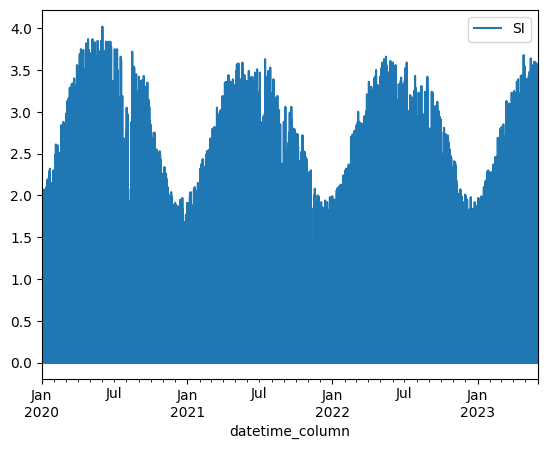

In [97]:
a.plot()
plt.show

In [69]:
a

,SI
datetime_column,
2020-01-01 00:00:00,0.00
2020-01-01 01:00:00,0.00
2020-01-01 02:00:00,0.00
2020-01-01 03:00:00,0.00
2020-01-01 04:00:00,0.00
...,...
2023-05-31 19:00:00,0.48
2023-05-31 20:00:00,0.03
2023-05-31 21:00:00,0.00


In [70]:
a.shape

(29928, 1)

In [22]:
a.loc[pd.isna(a['SI'])]

,SI
datetime_column,


In [23]:
a = a.diff().dropna()

In [24]:
index_4_weeks = pd.date_range(a.index[-1], freq='H', periods=1000, tz = None)

C:\Users\user\AppData\Local\Temp\ipykernel_13808\224797550.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_4_weeks = pd.date_range(a.index[-1], freq='H', periods=1000, tz = None)


In [25]:
index_4_weeks

DatetimeIndex(['2023-05-31 23:00:00', '2023-06-01 00:00:00',
               '2023-06-01 01:00:00', '2023-06-01 02:00:00',
               '2023-06-01 03:00:00', '2023-06-01 04:00:00',
               '2023-06-01 05:00:00', '2023-06-01 06:00:00',
               '2023-06-01 07:00:00', '2023-06-01 08:00:00',
               ...
               '2023-07-12 05:00:00', '2023-07-12 06:00:00',
               '2023-07-12 07:00:00', '2023-07-12 08:00:00',
               '2023-07-12 09:00:00', '2023-07-12 10:00:00',
               '2023-07-12 11:00:00', '2023-07-12 12:00:00',
               '2023-07-12 13:00:00', '2023-07-12 14:00:00'],
              dtype='datetime64[ns]', length=1000, freq='h')

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [40]:
from statsmodels import tsa

In [41]:
dir(tsa)

['PytestTester',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bds',
 '_innovations',
 'adfvalues',
 'api',
 'ar_model',
 'ardl',
 'arima',
 'arima_process',
 'base',
 'coint_tables',
 'deterministic',
 'exponential_smoothing',
 'filters',
 'forecasting',
 'holtwinters',
 'innovations',
 'interp',
 'regime_switching',
 'seasonal',
 'statespace',
 'stattools',
 'stl',
 'test',
 'tsatools',
 'vector_ar',
 'x13']

In [117]:
model_arima_set = auto_arima(a, trace=True, error_action='ignore', start_p=1, start_q=1,max_p=5, max_q=5, suppress_warnings=True, stepwise=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12311.252, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22235.660, Time=1.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12552.285, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15611.767, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22233.660, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12132.465, Time=9.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12202.035, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=21.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7714.838, Time=13.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11900.166, Time=4.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=21.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11648.318, Time=9.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6268.190, Time=25.89 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept 

In [113]:
model_arima = ARIMA(a, order=(1,0,2))


c:\Users\user\anaconda3\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [114]:
model_arima_fit = model_arima.fit()

In [115]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     SI   No. Observations:                29928
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -5461.698
Date:                Thu, 25 Jan 2024   AIC                          10933.396
Time:                        16:50:57   BIC                          10974.929
Sample:                    01-01-2020   HQIC                         10946.724
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6142      0.031     20.128      0.000       0.554       0.674
ar.L1          0.8521      0.004    229.472      0.000       0.845       0.859
ma.L1          0.4773      0.003    137.192      0.000       0.471       0.484
ma.L2          0.2982      0.004     81.499      0.000       0.291       0.305
sigma2         0.0843      0.000    213.118      0.000       0.084       0.085
===================================================================================
Ljung-Box (L1) (Q):                 132.34   Jarque-Bera (JB):             66498.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

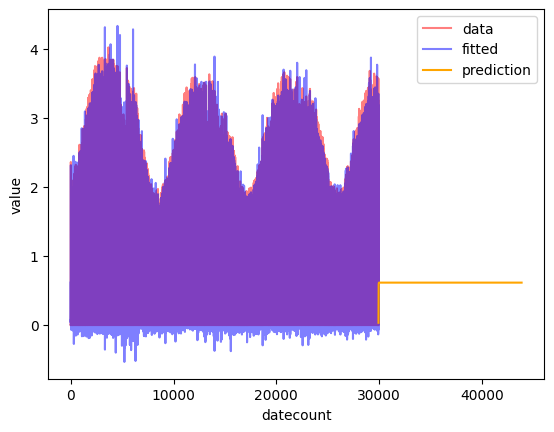

In [154]:
fitted_values = model_arima_fit.fittedvalues
k = 13920
forecast = model_arima_fit.get_forecast(k)
predicted_values = forecast.predicted_mean

pred_x = range(len(a)+1, len(a)+k+1) 

plt.plot(range(len(a)), a,color='red', label = 'data', alpha=0.5)
plt.plot(range(len(a)), fitted_values, label='fitted',color='blue', alpha=0.5)
plt.plot(pred_x,predicted_values,color='orange',label='prediction')

plt.xlabel("datecount")
plt.ylabel("value")
plt.legend()
plt.show()


In [ ]:
model = ARIMA(a, order=(1, 2, 3))
fitted = model.fit()

c:\Users\user\anaconda3\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [36]:
fc, se, conf = fitted.get_forecast(3, alpha=0.05)

In [37]:
fc

-0.03750069991901059

In [33]:
fc_series = pd.Series(fc, index=index_4_weeks)

In [34]:
index_4_weeks

DatetimeIndex(['2023-05-31 23:00:00', '2023-06-01 00:00:00',
               '2023-06-01 01:00:00', '2023-06-01 02:00:00',
               '2023-06-01 03:00:00', '2023-06-01 04:00:00',
               '2023-06-01 05:00:00', '2023-06-01 06:00:00',
               '2023-06-01 07:00:00', '2023-06-01 08:00:00',
               ...
               '2023-07-12 05:00:00', '2023-07-12 06:00:00',
               '2023-07-12 07:00:00', '2023-07-12 08:00:00',
               '2023-07-12 09:00:00', '2023-07-12 10:00:00',
               '2023-07-12 11:00:00', '2023-07-12 12:00:00',
               '2023-07-12 13:00:00', '2023-07-12 14:00:00'],
              dtype='datetime64[ns]', length=1000, freq='h')

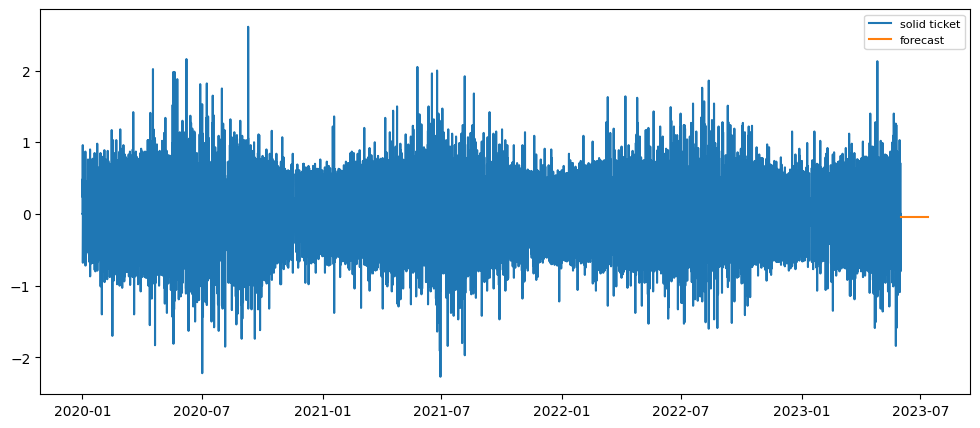

In [35]:
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(a, label='solid ticket')
plt.plot(fc_series, label='forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()